## <font color=darkBlue> Distribuição Binomial</font>
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

### Exemplos 
* Jogar uma moeda 10 vezes. Seja X = número de obtido de caras;
* Cada amostra de ar tem 10 % de chance de conter uma molécula de rara particular. Seja X = número de amostras de ar que contém a molécula rara nas 18 amostras analisadas;
* Nos próximos 20 nascimentos em um hospital, seja X o número de nascimentos de meninas.

### Condições de Uso 
* As tentativas devem ser independentes;
* Existem apenas dois resultados possíveis: sucesso e fracasso; 
* A probabilidade de sucesso é constante em cada tentativa.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

### <font color=darkBlue size=5> Exercício 1:</font>
Cada amostra de água tem 10 % de chance de conter determinado poluente orgânico. Considere que as amostras sejam independentes com relação a presença de poluente. Encontre a probabilidade de que nas próximas 18 amostras analisadas, exatamente duas contenham o poluente.

<font color=darkBlue size=3> (1) Verificar as condições de uso </font>
* As tentativas são independentes ? (O fato de possuir poluente em uma amostra não significa que vai ter na outra)
* Existem apenas dois resultados possíveis ? (Ou têm poluentes na amostra ou não)
* A probabilidade de sucesso é constante ? (sim, 10 %)

<font color=darkBlue size=3> (2) Definindo as variáveis </font>

In [1]:
from scipy.stats import binom

n = 18
p = 0.1
k = 2

print('Número de eventos estudados (amostras analisdas): {}'.format(n))
print('Probabilidade de sucesso (chance da amostra conter o poluente orgânico): {}'.format(p))
print('Número de eventos desejados que tenham sucesso: {}'.format(k))

Número de eventos estudados (amostras analisdas): 18
Probabilidade de sucesso (chance da amostra conter o poluente orgânico): 0.1
Número de eventos desejados que tenham sucesso: 2


<font color=darkBlue size=3> (3) Aplicação da Fórmula </font>

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

In [2]:
probabilidade = binom.pmf(k, n, p)
print('A probabilidade que das 18 amostras apenas duas tenham o poluente é {0:.3f}'.format(probabilidade))

A probabilidade que das 18 amostras apenas duas tenham o poluente é 0.284


### <font color=darkBlue> Exercício 1 (Continuação):</font>
Determine a probabilidade de que, no mínimo, quatro amostras contenham o poluente e que o poluente esteja em pelo menos 3 amostras e que esteja em menos de 7 amostras. Por fim, faça um gráfico da distribuição binomial.

In [3]:
probabilidade = 1 - binom.cdf(3, n, p)
print('A probabilidade que no mínimo 4 amostras contenham o poluente é {0:.3f}'.format(probabilidade))

A probabilidade que no mínimo 4 amostras contenham o poluente é 0.098


In [4]:
probabilidade = binom.cdf(6, n, p) - binom.cdf(2, n, p)
print('A probabilidade que o  poluente esteja em pelo menos 3 amostras e que esteja em menos de 7 amostras é {0:.3f}'.format(probabilidade))

A probabilidade que o  poluente esteja em pelo menos 3 amostras e que esteja em menos de 7 amostras é 0.265


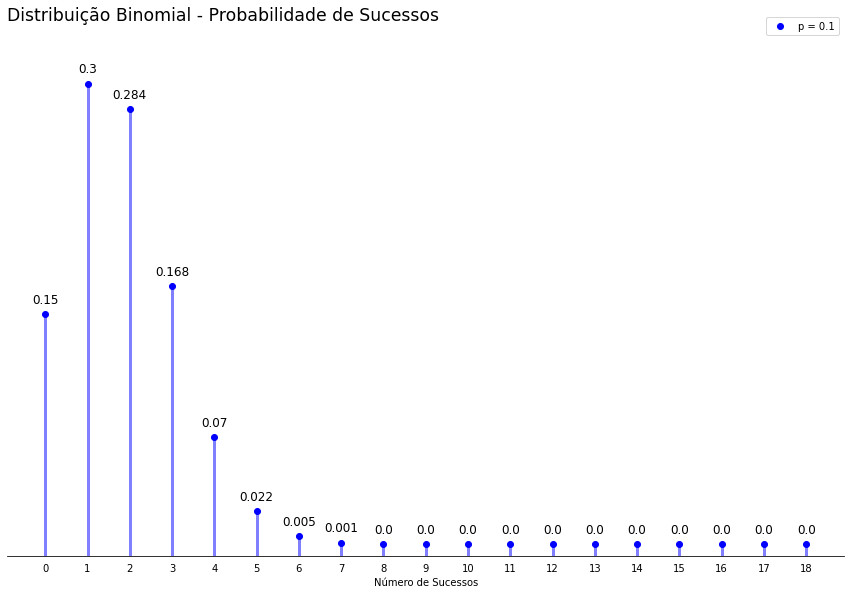

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = 18
p = 0.1
X = np.arange(0, n + 1, 1)
X_rotulos = np.arange(0, n + 1, 1)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(X, binom.pmf(X, n, p), 'bo', ms=6)

ax.set_title("Distribuição Binomial - Probabilidade de Sucessos", fontdict={'fontsize': 'xx-large',
 'fontweight' : 500,
 'verticalalignment': 'top'}, loc = 'left')


ax.set_xticks(range(len(X)))
ax.set_ylim(ax.get_ylim()[0]*0.5, ax.get_ylim()[1]+ax.get_ylim()[1]*0.1)
ax.set(yticklabels=[])
ax.set(xlabel = 'Número de Sucessos')
ax.tick_params(left=False)  
ax.tick_params(bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(['p = '+str(p)])

ax.vlines(X, ax.get_ylim()[0], binom.pmf(X, n, p), colors='blue', linestyles='-', lw=3, alpha=0.5)

for x_pos, y_pos in zip(X_rotulos,  binom.pmf(X_rotulos, n, p)):
    ax.text(x_pos, y_pos+ax.get_ylim()[1]*0.04, str(y_pos.round(3)), va="top", ha="center", 
    fontsize="large", fontweight=550, color='k')

### <font color=darkBlue size=5> Gráfico de Distribuição Binomial </font>

In [6]:
import ipywidgets as widgets
from IPython.display import display

In [7]:
@widgets.interact(
    n=(1, 50), p=(.0, 1,0.01)
    )

def plot(n=18, p=0.1):
    X = np.arange(0, n + 1, 1)
    X_rotulos = np.arange(0, n + 1, 1)

    fig, ax = plt.subplots(figsize=(15,10))
    ax.plot(X, binom.pmf(X, n, p), 'bo', ms=6)

    ax.set_title("Distribuição Binomial - Probabilidade de Sucessos", fontdict={'fontsize': 'xx-large',
    'fontweight' : 500,
    'verticalalignment': 'top'}, loc = 'left')


    ax.set_xticks(range(len(X)))
    ax.set_ylim(ax.get_ylim()[0]*0.5, ax.get_ylim()[1]+ax.get_ylim()[1]*0.1)
    ax.set(yticklabels=[])
    ax.set(xlabel = 'Número de Sucessos')
    ax.tick_params(left=False)  
    ax.tick_params(bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(['p = '+str(p)])

    ax.vlines(X, ax.get_ylim()[0], binom.pmf(X, n, p), linestyles='-', lw=3, alpha=0.5)

    for x_pos, y_pos in zip(X_rotulos,  binom.pmf(X_rotulos, n, p)):
        ax.text(x_pos, y_pos+ax.get_ylim()[1]*0.04, str(y_pos.round(3)), va="top", ha="center", 
        fontsize="large", fontweight=550)

interactive(children=(IntSlider(value=18, description='n', max=50, min=1), FloatSlider(value=0.1, description=…